## Exploring IMBD's Top 250 Movies (August 2024)

- IMDB Top 250: [https://www.imdb.com/chart/top/](https://www.imdb.com/chart/top/)
- Dataset: [https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv](https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv)

In [650]:
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import html
from matplotlib.ticker import FuncFormatter

In [1242]:
data = pd.read_csv("IMDB_Top250.csv", index_col=[0])

In [1243]:
data.head(2)

,url,name,image,description,rating,rating_count,content_rating,genre,keywords,actors,...,release_date,rank,added_by,budget_amount,budget_currency,gross_amount,gross_currency,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
0,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2934407,R,['Drama'],"prison,based on the works of stephen king,esca...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",...,1994-10-14,1,1500000,25000000.0,USD,28767189.0,USD,Oscar,0.0,7.0
1,https://www.imdb.com/title/tt0068646/,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,"Don Vito Corleone, head of a mafia family, dec...",9.2,2045292,R,"['Crime', 'Drama']","mafia,patriarch,crime family,organized crime,g...","['Marlon Brando', 'Al Pacino', 'James Caan']",...,1972-03-24,2,1300000,6000000.0,USD,136381073.0,USD,Oscar,3.0,8.0


## Preprocessing

Let's take care of the date column:

In [1246]:
data["release_date"] = pd.to_datetime(data["release_date"])

Finally, let's take care of some unescaped characters:

In [1247]:
data["name"] = data["name"].apply(html.unescape)

## Global Chart Styles

In [588]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.autolayout'] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlepad"] = 40

## Films

With rank taken into account:

In [1248]:
top_films_rank = data[["rank", "name", "rating"]].drop_duplicates().sort_values(
    by=["rank", "rating"], 
    ascending=[True, False]
).head(10)

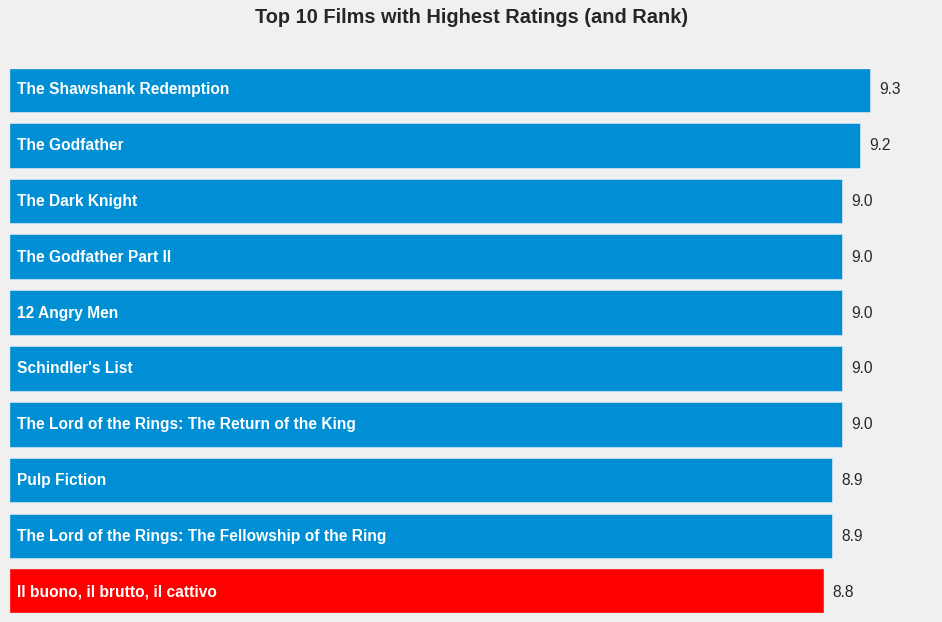

In [1249]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rank['name'], top_films_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings (and Rank)")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-rank.png")
plt.show()

Without rank taken into account:

In [1250]:
top_films_no_rank = data[["name", "rating", "rank"]].drop_duplicates().sort_values(
    by="rating",
    ascending=False
).head(10).reset_index()

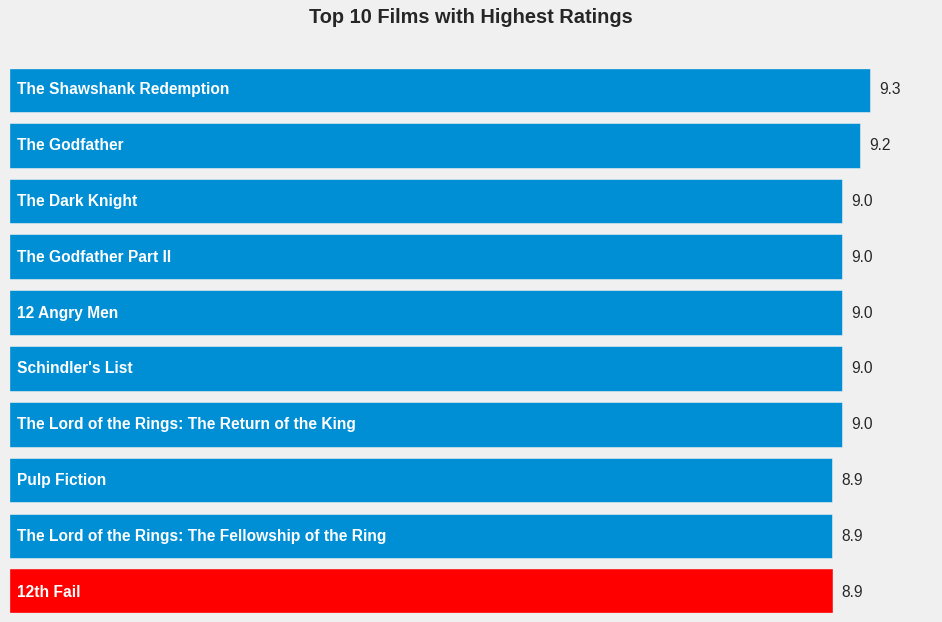

In [1251]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_no_rank['name'], top_films_no_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_no_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-no-rank.png")
plt.show()

`12th Fail` has a higher ranking (8.9) than `Il buono, il brutto, il cattivo` but less ratings (`127k` vs `883k`), which is why IMDB is placing it lower

Most ratings

In [1252]:
top_films_rating_count = data[["name", "rank", "rating_count"]].sort_values(
    by="rating_count",
    ascending=False
).head(10).reset_index(drop=True)

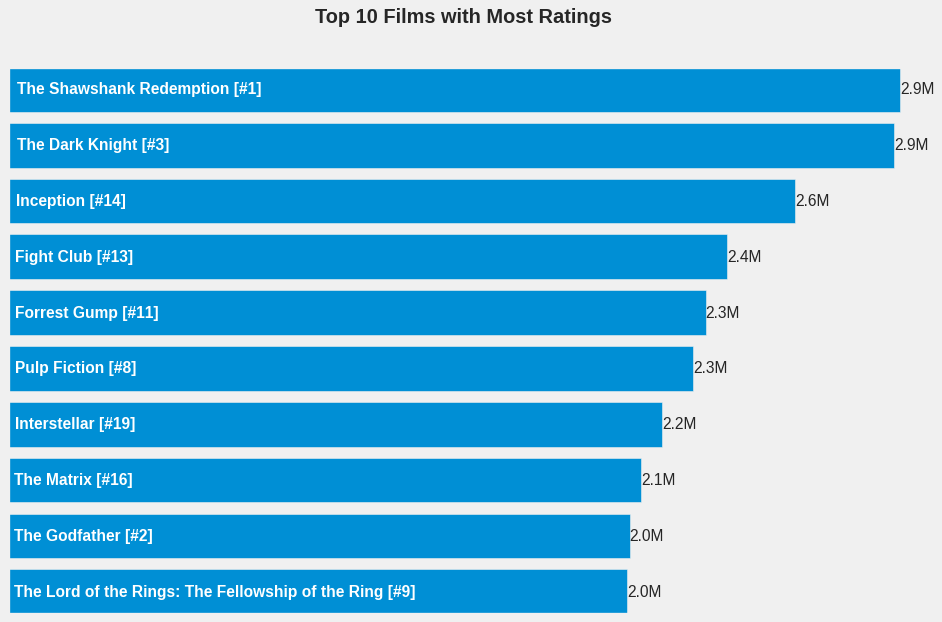

In [1253]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rating_count['name'], top_films_rating_count['rating_count'])
ax.set_title("Top 10 Films with Most Ratings")
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{top_films_rating_count["name"][idx]} [#{top_films_rating_count["rank"][idx]}]',
            ha="left", va="center",  
            color="white",
            fontweight='bold')  

    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{top_films_rating_count["rating_count"][idx]/ 1_000_000:.1f}M',  
            ha="left", va="center")
    
    
plt.savefig("top-10-most-ratings.png")
plt.show()

Most of the films with the highest number of votes also rank among the top-rated ones.

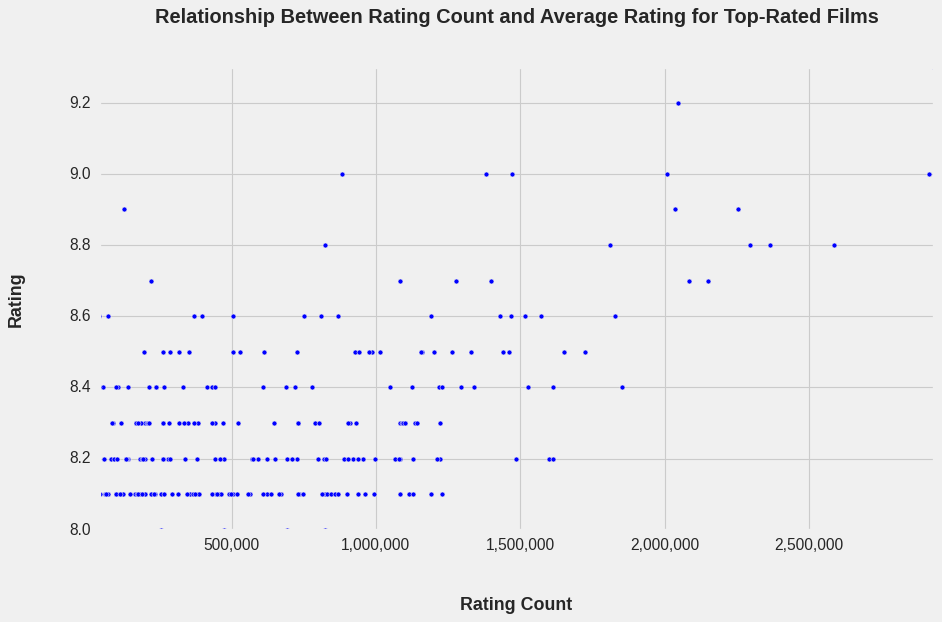

In [1254]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=True)
bars = ax.scatter(x=data['rating_count'], y=data['rating'])
ax.set_title("Relationship Between Rating Count and Average Rating for Top-Rated Films")
ax.set_ylabel("Rating", labelpad=40)
ax.set_xlabel("Rating Count", labelpad=40)
ax.set_xlim([data["rating_count"].min(), data["rating_count"].max()])
ax.set_ylim([data["rating"].min(), data["rating"].max()])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x:,.0f}"))
plt.savefig("rating-count-vs-rating.png")
plt.show()

## Decades

In [1276]:
data.columns

Index(['url', 'name', 'image', 'description', 'rating', 'rating_count',
       'content_rating', 'genre', 'keywords', 'actors', 'director', 'creator',
       'duration', 'release_year', 'popularity', 'metascore', 'plot',
       'interests', 'budget', 'gross', 'credits', 'reviews', 'countries',
       'production', 'wins', 'nominations', 'release_date', 'rank', 'added_by',
       'budget_amount', 'budget_currency', 'gross_amount', 'gross_currency',
       'prestigious_award_type', 'prestigious_award_wins',
       'prestigious_award_nominations'],
      dtype='object')

In [1277]:
decades_data = data[["release_year", 
                     "name",
                     "rating_count",
                     "rating",
                     "reviews",
                     "added_by",
                     "metascore",
                     "wins",
                     "nominations",
                     "content_rating",
                     "credits"
                    ]].copy()
decades_data["decade"] = data["release_year"].apply(lambda x: (x // 10) * 10)
decades_data = decades_data.groupby("decade").agg({
    "name": "count",
    "rating": "mean",
    "rating_count": "mean",
    "reviews": "sum",
    "added_by": "sum",
    "metascore": "mean",
    "wins": "mean",
    "nominations": "mean",
    "content_rating": "count",
    "credits": "mean"
})

In [1278]:
decades_data

,name,rating,rating_count,reviews,added_by,metascore,wins,nominations,content_rating,credits
decade,,,,,,,,,,
1920,6,8.166667,1.106285e+05,300,815900,98.000000,3.833333,1.833333,6,101.166667
1930,7,8.257143,2.342414e+05,989,1665000,90.666667,8.571429,5.428571,7,227.142857
1940,12,8.258333,2.381202e+05,1322,2922900,94.000000,9.916667,6.333333,12,152.833333
1950,21,8.285714,2.585708e+05,2072,5676000,92.523810,12.428571,8.333333,21,117.619048
1960,17,8.323529,3.187804e+05,2309,5109100,86.529412,10.941176,9.882353,17,139.411765
1970,17,8.352941,7.771698e+05,3909,9129000,87.411765,22.764706,21.352941,17,231.352941
1980,26,8.284615,6.530473e+05,4472,11574000,79.560000,15.576923,15.769231,25,338.538462
1990,41,8.392683,1.090578e+06,6345,28340000,78.150000,35.048780,37.682927,41,456.121951
2000,48,8.300000,9.433452e+05,5265,29303000,80.659091,58.520833,67.687500,48,664.229167


Rating counts trend over time

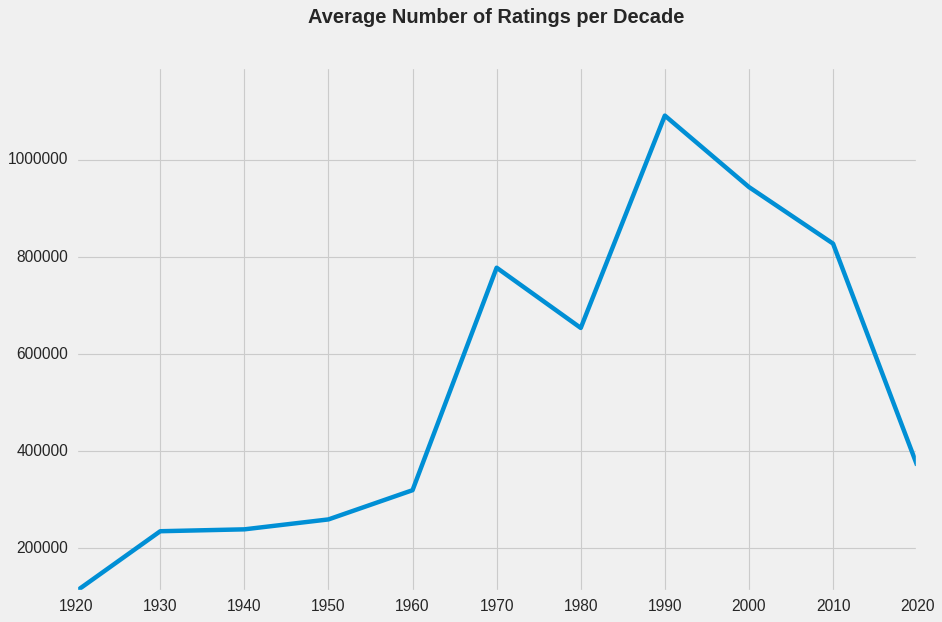

In [1269]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating_count"], label='Average Rating Count')
ax.set_title("Average Number of Ratings per Decade")
ax.set_ylim([decades_data["rating_count"].min(), decades_data["rating_count"].max() + 100000])
plt.savefig("rating-count-trend.png")
plt.show()

Average rating per decade over time

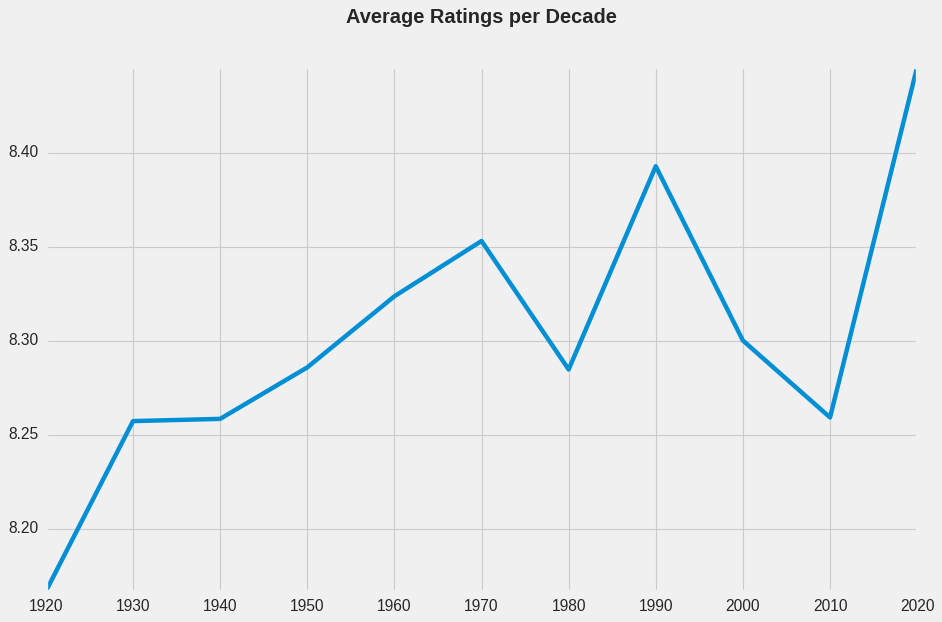

In [1279]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], label='Average Rating')
ax.set_title("Average Ratings per Decade")
ax.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])

plt.savefig("avg-ratings-per-decade.png")
plt.show()

## Strongest Decades

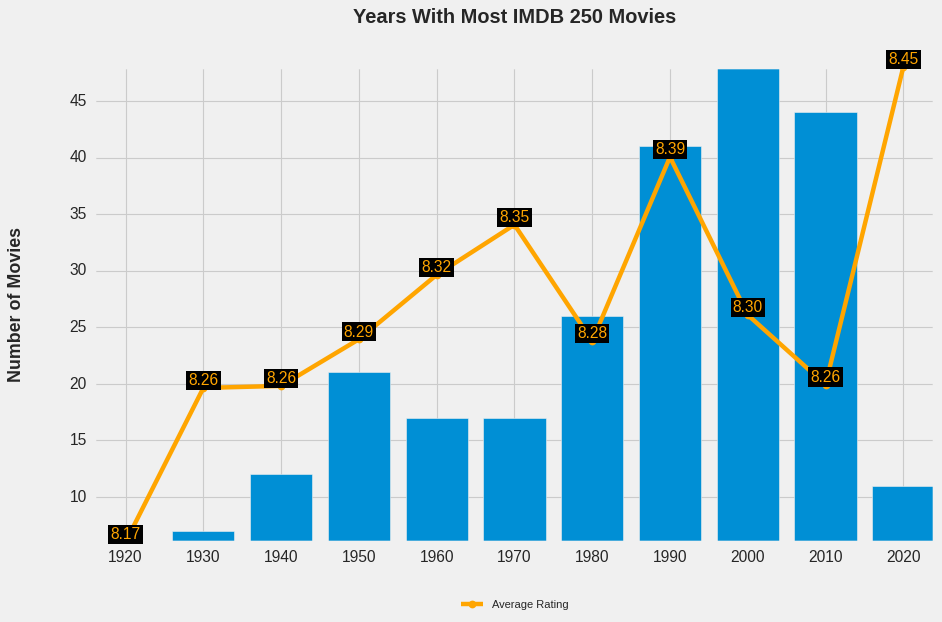

In [1296]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["name"])
ax2 = ax1.twinx()

points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_title("Years With Most IMDB 250 Movies")
ax1.set_ylabel("Number of Movies", labelpad=40)
ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
ax2.set_yticks([])

for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )
plt.savefig("best-years.png")
plt.show()

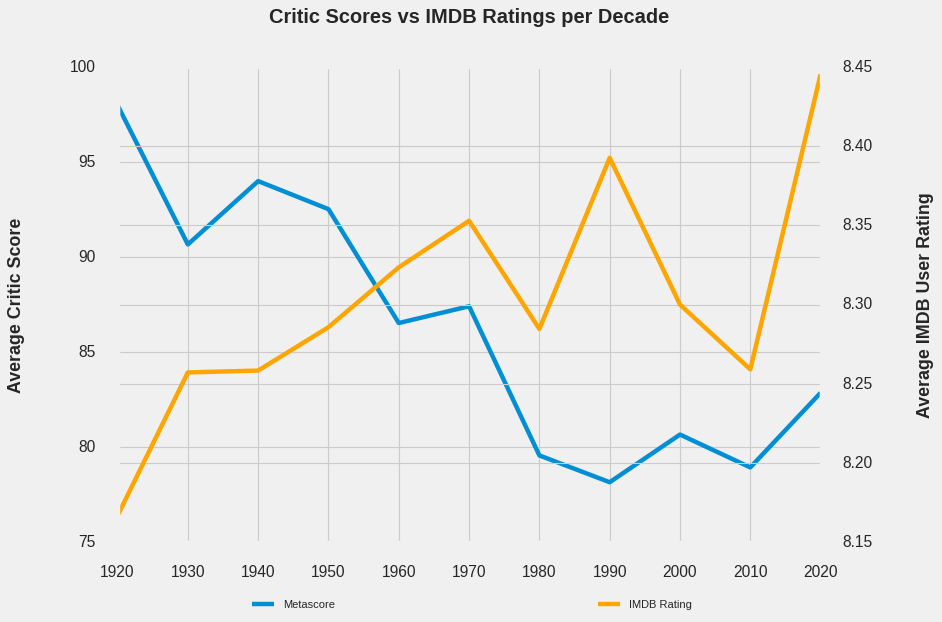

In [1326]:
fig, ax1 = plt.subplots(figsize=(12, 8))
metascore = ax1.plot(decades_data.index.astype(int).astype(str), decades_data["metascore"], label="Metascore")

ax2 = ax1.twinx()
ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  # Increase padding on the x-axis
ax1.tick_params(axis='y', pad=20)  # Increase padding on the y-axis for ax1
ax2.tick_params(axis='y', pad=20) 

ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.1), ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.75, -0.1), ncol=1)

ax1.set_title("Critic Scores vs IMDB Ratings per Decade")
ax1.set_ylabel("Average Critic Score", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

# points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
# ax1.set_title("Years With Most IMDB 250 Movies")
# ax1.set_ylabel("Number of Movies", labelpad=40)
# ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
# ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
# ax2.set_yticks([])

# for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
#     ax2.text(
#         x,
#         y,
#         f"{y:.2f}",
#         va='bottom',
#         ha='center',
#         fontsize=14,
#         color='orange',
#         bbox=dict(facecolor='black', edgecolor='none', pad=2)
#     )
plt.savefig("critics-vs-user-ratings.png")
plt.show()

## Most Added to Watchlist

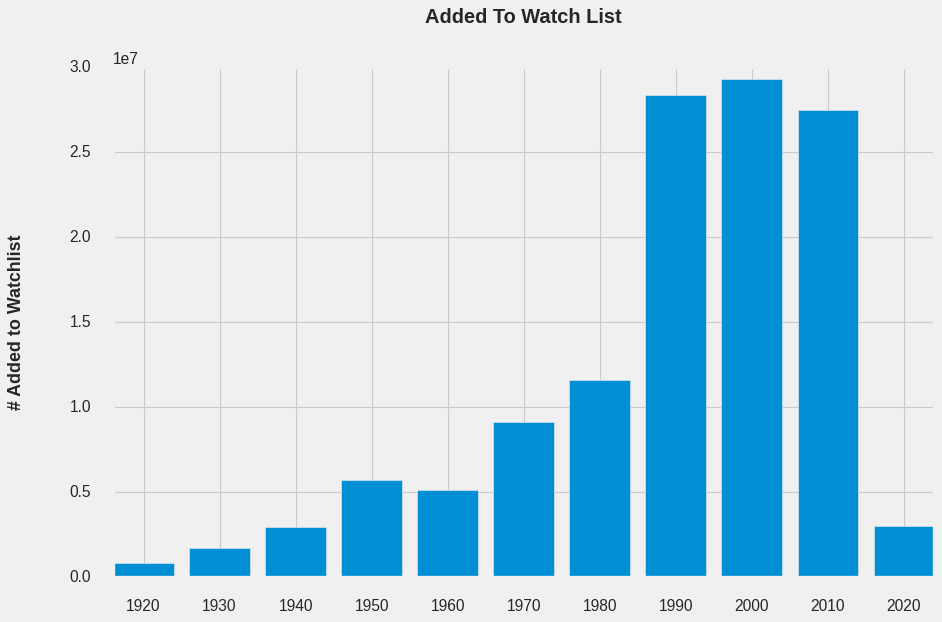

In [1331]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["added_by"], label="Added To Watchlist")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

plt.show()

## Reviews

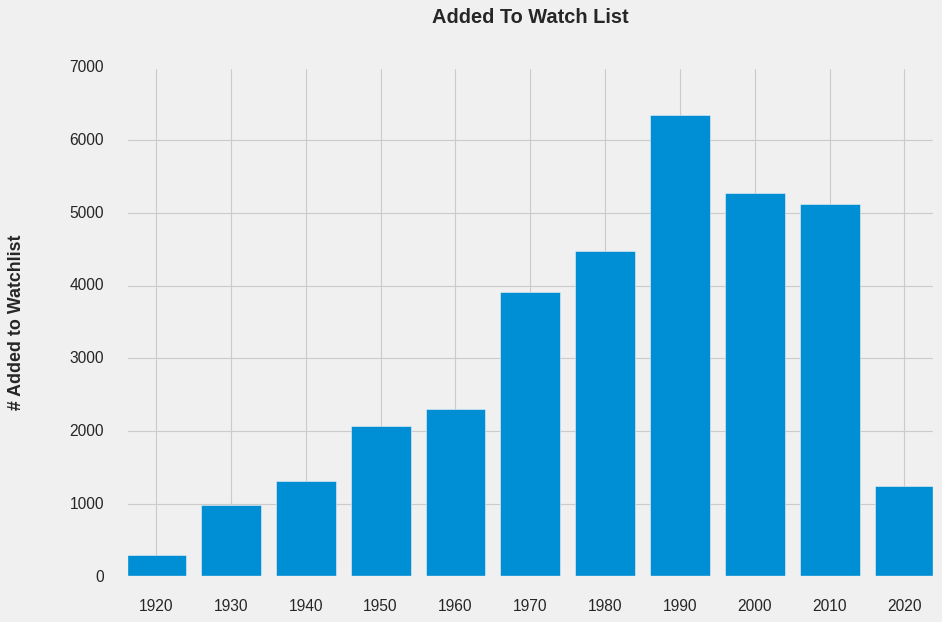

In [1334]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["reviews"], label="Reviews")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)


plt.show()

## Production Companies

In [1397]:
exploded_productions = data.copy()

In [1398]:
exploded_productions["production"] = exploded_productions["production"].apply(literal_eval)

In [1399]:
exploded_productions = exploded_productions.explode("production")

In [1411]:
top_production_companies = exploded_productions.groupby("production").agg({
    "url": "count",
    "rating": "mean",
    "metascore": "mean",
    "wins": "sum",
    "nominations": "sum"
}).sort_values(by=["url", "rating"], ascending=False).head(10)

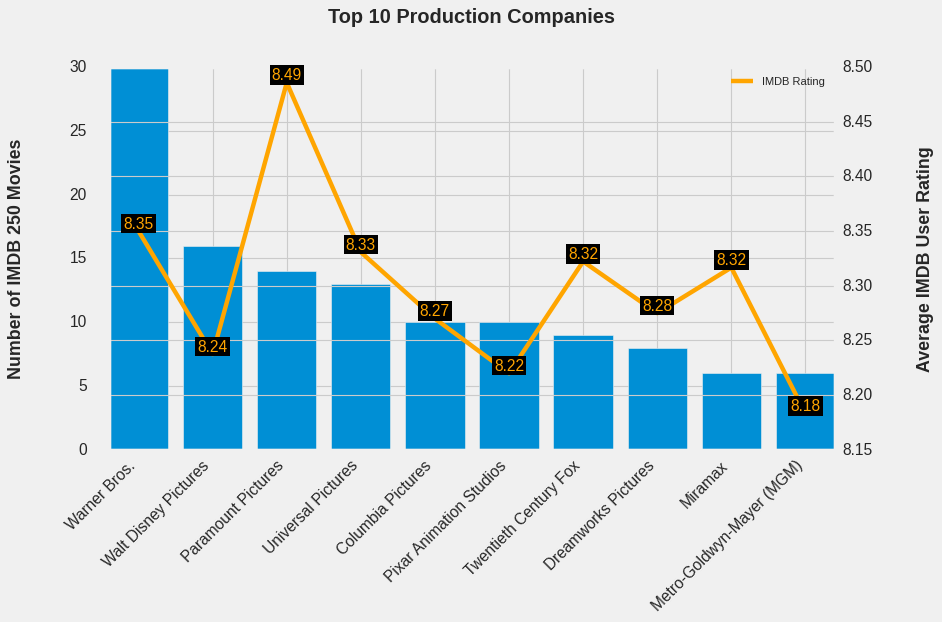

In [1437]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(top_production_companies.index, top_production_companies["url"], label="Production Company")
ax2 = ax1.twinx()
ratings = ax2.plot(top_production_companies.index, top_production_companies["rating"], c="orange", label="IMDB Rating")

ax1.set_xticks(range(len(top_production_companies.index)))
ax1.set_xticklabels(top_production_companies.index, rotation=45, ha="right")

ax1.tick_params(axis="x", rotation=45)
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Top 10 Production Companies")
ax1.set_ylabel("Number of IMDB 250 Movies", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

for x, y in zip(top_production_companies.index, top_production_companies["rating"]):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )

ax2.legend(loc='upper right',)


plt.show()